In [39]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

C:\Users\BIT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


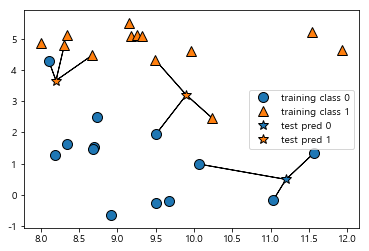

In [40]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [41]:
# k-NN 모델 만들기
# fit : (X_train, y_train) -> 훈련
# predict : ( x ) -> 예측하기
# score : (X, y) -> 점수 (predict의 평균)

# train_test_split : 섞고 잘라서 훈련용, 테스트용 데이터셋을 생성
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\BIT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [42]:
# k-NN 모델 준비
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3) # 이웃의 갯수를 3개 갖는 모델 생성

In [43]:
# k-NN 훈련하기
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [44]:
print("테스트 세트 예측 predict: {}".format(clf.predict(X_test)))

테스트 세트 예측 predict: [1 0 1 0 1 0 0]


In [45]:
print(y_test)  # 원래 정답

[1 0 1 0 1 1 0]


In [46]:
print("테스트 세트 정확도 score: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 score: 0.86


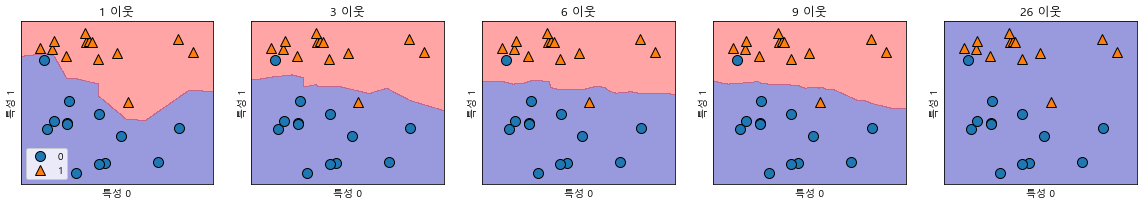

In [48]:
fig, axes = plt.subplots(1, 5, figsize=(20,3))

for n_neighbors, ax in zip([1,3,6,9,26], axes): #zip: / axes:1줄에
    # fit 메서드는 self 반환을 하기 때문에 객체 생성과 메서드를 한줄에 사용 할 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    #(모델,x,채우겠다,eps,ax:공간,alpha그냥쓰는거)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax) #scatter:점찍기
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend(loc=3) #legend:범례(좌측아래)